<a href="https://colab.research.google.com/github/Jayesh2422/ML_LAB/blob/main/Lab1%262New.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

In [ ]:
df = pd.read_csv('diabetes_data_upload.csv')

df = df.replace({
    'Yes': 1,
    'No': 0,
    'Male': 1,
    'Female': 0,
    'Positive': 1,
    'Negative': 0,
})

df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [3]:
print("Dataset Shape:", df.shape)
print("\nColumn Names:")
for col in df.columns:
    print(col)

Dataset Shape: (10000, 14)

Column Names:
UDI
Product ID
Type
Air temperature [K]
Process temperature [K]
Rotational speed [rpm]
Torque [Nm]
Tool wear [min]
Machine failure
TWF
HDF
PWF
OSF
RNF


In [4]:
df.info()
print("\nMissing Values:\n")
print(df.isnull().sum())

df.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
10%,1000.90000,297.400000,308.100000,1364.000000,27.200000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
90%,9000.10000,302.700000,311.900000,1746.000000,52.600000,195.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [9]:
df_clean = df.drop(columns=['STUDENT ID'], errors='ignore')
df_clean.head()


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


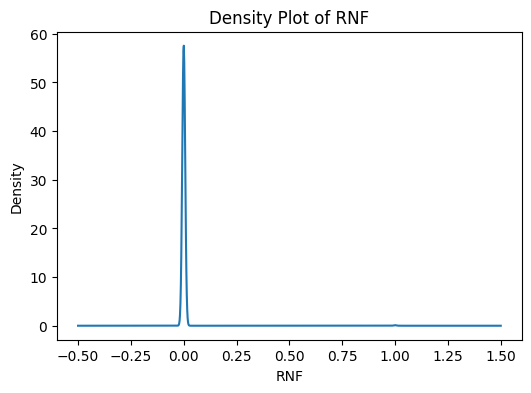

In [11]:
target_col = df.columns[-1]

plt.figure(figsize=(6,4))
df[target_col].plot.density()
plt.title(f'Density Plot of {target_col}')
plt.xlabel(target_col)
plt.show()


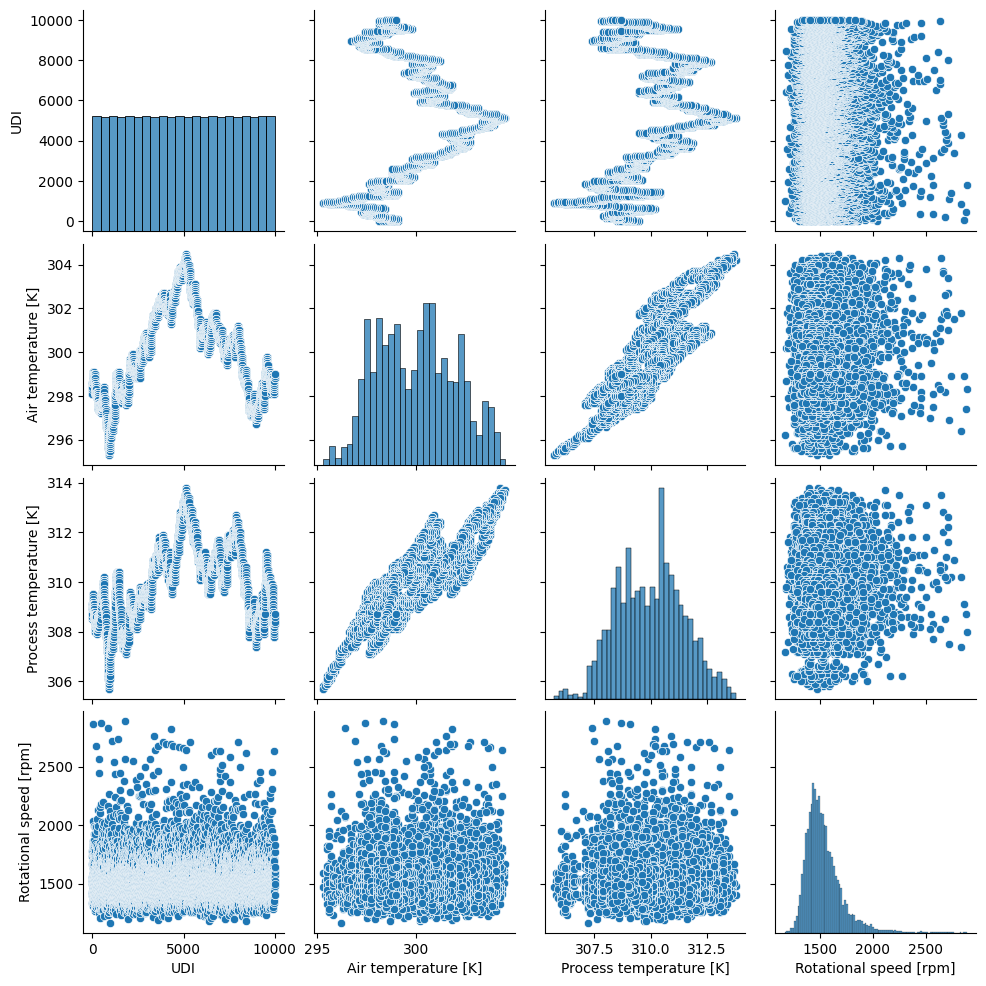

In [12]:
sample_cols = df_clean.columns[:6]
sns.pairplot(df_clean[sample_cols])

In [14]:
correlation_matrix = df_clean.select_dtypes(include=['int64','float64']).corr()
correlation_matrix


,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
UDI,1.000000,0.117428,0.324428,-0.006615,0.003207,-0.010702,-0.022892,0.009154,-0.022215,-0.023557,-0.000990,-0.005954
Air temperature [K],0.117428,1.000000,0.876107,0.022670,-0.013778,0.013853,0.082556,0.009955,0.137831,0.003470,0.001988,0.017688
Process temperature [K],0.324428,0.876107,1.000000,0.019277,-0.014061,0.013488,0.035946,0.007315,0.056933,-0.003355,0.004554,0.022279
Rotational speed [rpm],-0.006615,0.022670,0.019277,1.000000,-0.875027,0.000223,-0.044188,0.010389,-0.121241,0.123018,-0.104575,-0.013088
Torque [Nm],0.003207,-0.013778,-0.014061,-0.875027,1.000000,-0.003093,0.191321,-0.014662,0.142610,0.083781,0.183465,0.016136
Tool wear [min],-0.010702,0.013853,0.013488,0.000223,-0.003093,1.000000,0.105448,0.115792,-0.001287,-0.009334,0.155894,0.011326
Machine failure,-0.022892,0.082556,0.035946,-0.044188,0.191321,0.105448,1.000000,0.362904,0.575800,0.522812,0.531083,0.004516
TWF,0.009154,0.009955,0.007315,0.010389,-0.014662,0.115792,0.362904,1.000000,-0.007332,0.008577,0.038243,0.030970
HDF,-0.022215,0.137831,0.056933,-0.121241,0.142610,-0.001287,0.575800,-0.007332,1.000000,0.018443,0.046396,-0.004706
PWF,-0.023557,0.003470,-0.003355,0.123018,0.083781,-0.009334,0.522812,0.008577,0.018443,1.000000,0.115836,-0.004273


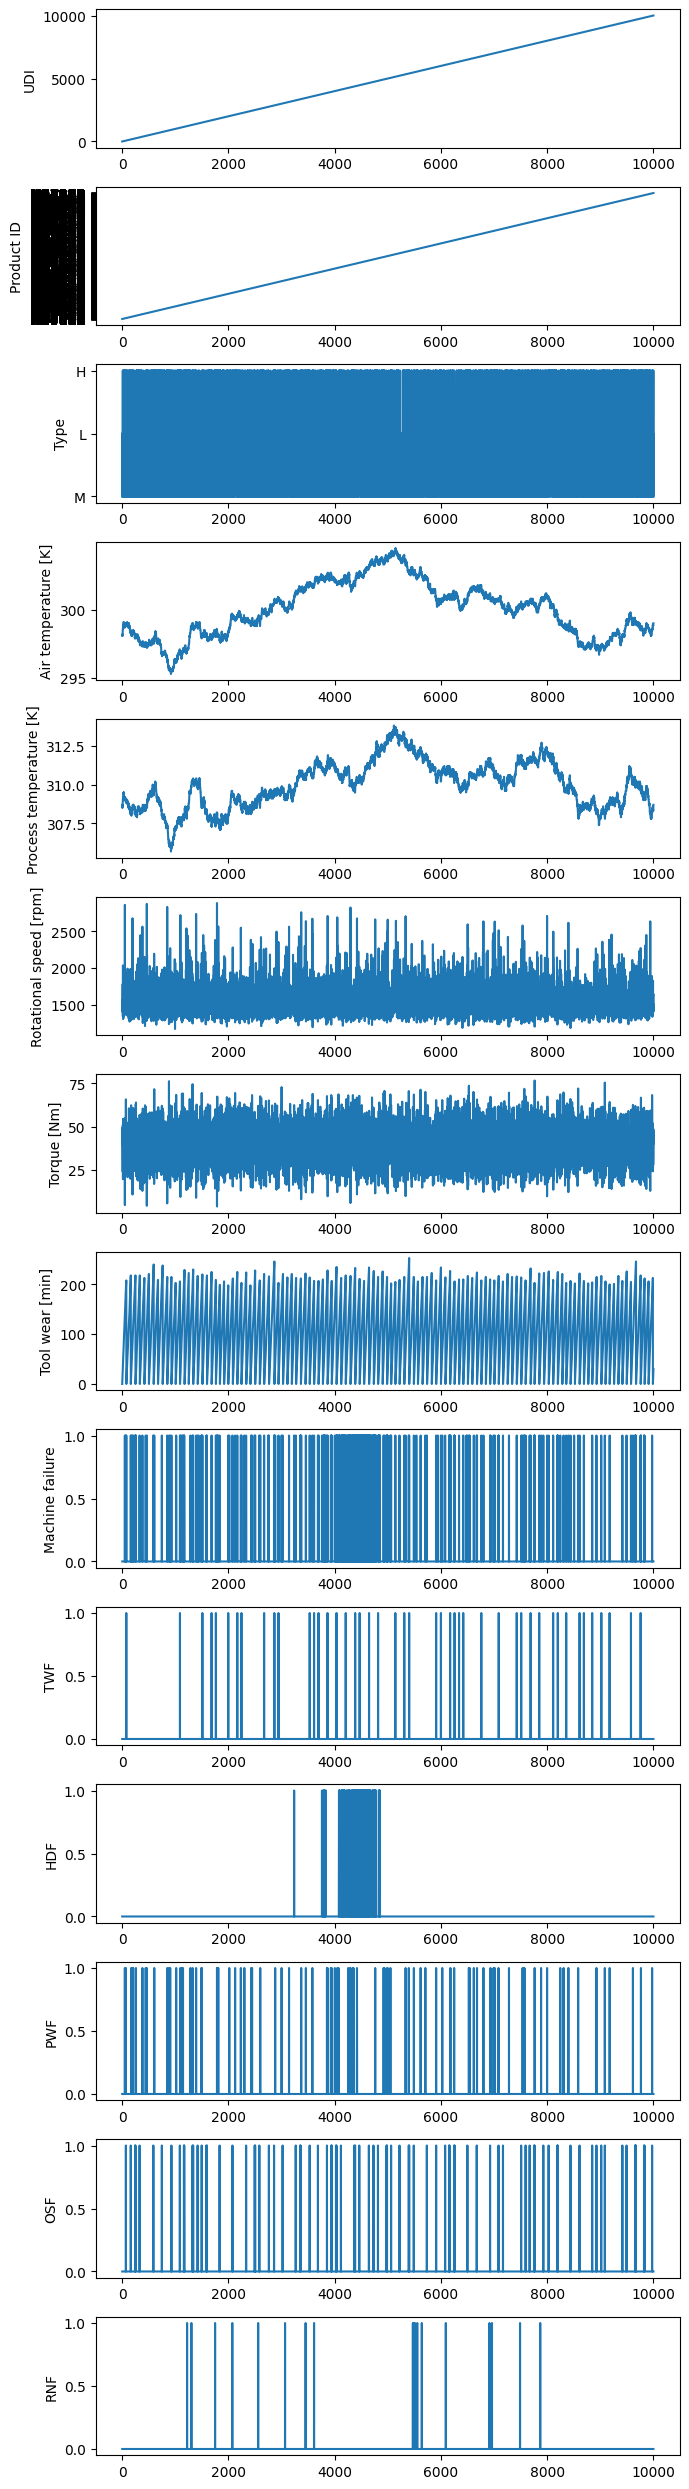

In [15]:
fig, axs = plt.subplots(len(df_clean.columns), 1, figsize=(7, 25))
for i, col in enumerate(df_clean.columns):
    axs[i].plot(df_clean[col])
    axs[i].set_ylabel(col)
plt.tight_layout()
plt.show()


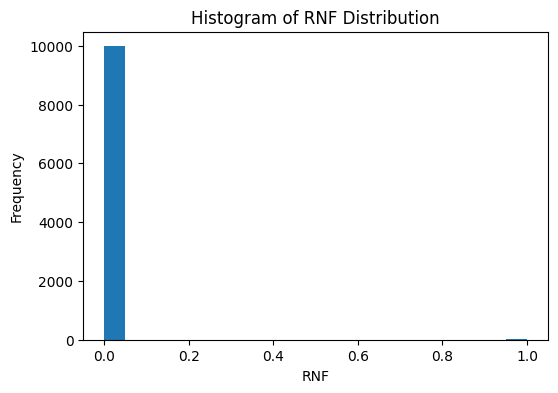

In [17]:
target_col = df_clean.columns[-1]

plt.figure(figsize=(6,4))
plt.hist(df_clean[target_col], bins=20)
plt.title(f'Histogram of {target_col} Distribution')
plt.xlabel(target_col)
plt.ylabel('Frequency')
plt.show()


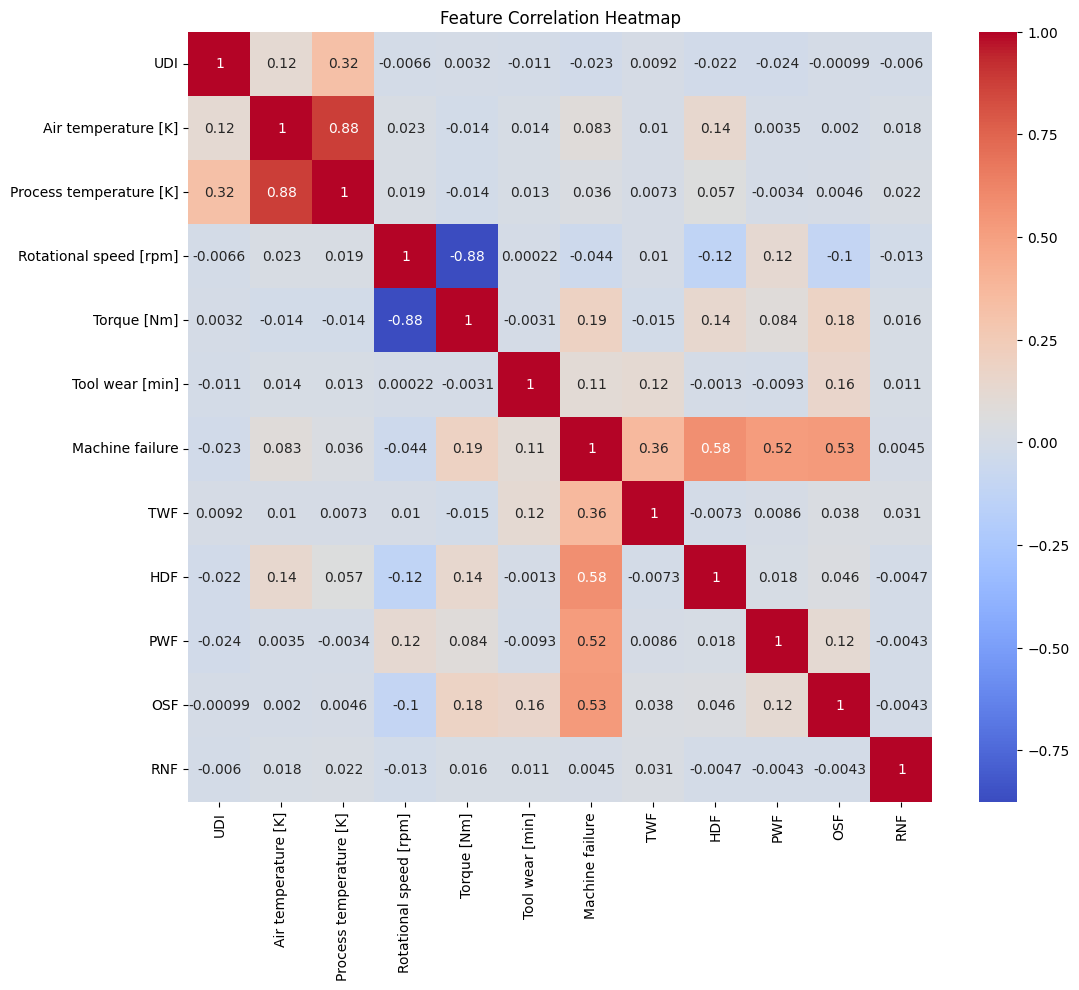

In [19]:
numeric_df = df_clean.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(12,10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


In [21]:
target_col = df_clean.columns[-1]

X = df_clean.drop(columns=[target_col])
y = df_clean[target_col]

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (10000, 13)
y shape: (10000,)


In [23]:
numeric_df = df_clean.select_dtypes(include=['int64', 'float64'])
target_col = numeric_df.columns[-1]

corr_target = numeric_df.corr()[target_col].sort_values(ascending=False)
corr_target


,RNF
RNF,1.000000
TWF,0.030970
Process temperature [K],0.022279
Air temperature [K],0.017688
Torque [Nm],0.016136
Tool wear [min],0.011326
Machine failure,0.004516
PWF,-0.004273
OSF,-0.004341
HDF,-0.004706


In [24]:
important_features = corr_target[abs(corr_target) > 0.2]
important_features

,RNF
RNF,1.0


In [26]:
X_numeric = X.select_dtypes(include=['int64', 'float64'])

minmax_scaler = MinMaxScaler()
X_minmax = minmax_scaler.fit_transform(X_numeric)
X_minmax[:5]


array([[0.00000000e+00, 3.04347826e-01, 3.58024691e-01, 2.22933644e-01,
        5.35714286e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00010001e-04, 3.15217391e-01, 3.70370370e-01, 1.39697322e-01,
        5.83791209e-01, 1.18577075e-02, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.00020002e-04, 3.04347826e-01, 3.45679012e-01, 1.92083818e-01,
        6.26373626e-01, 1.97628458e-02, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.00030003e-04, 3.15217391e-01, 3.58024691e-01, 1.54249127e-01,
        4.90384615e-01, 2.76679842e-02, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.00040004e-04, 3.15217391e-01, 3.70370370e-01, 1.39697322e-01,
        4.97252747e-01, 3.55731225e-02, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+

In [28]:
numeric_df = df_clean.select_dtypes(include=['int64', 'float64'])

print("Variance:\n", numeric_df.var())
print("\nStandard Deviation:\n", numeric_df.std())


Variance:
 UDI                        8.334167e+06
Air temperature [K]        4.001035e+00
Process temperature [K]    2.201467e+00
Rotational speed [rpm]     3.214279e+04
Torque [Nm]                9.937964e+01
Tool wear [min]            4.051850e+03
Machine failure            3.275407e-02
TWF                        4.579298e-03
HDF                        1.136889e-02
PWF                        9.410691e-03
OSF                        9.704930e-03
RNF                        1.896580e-03
dtype: float64

Standard Deviation:
 UDI                        2886.895680
Air temperature [K]           2.000259
Process temperature [K]       1.483734
Rotational speed [rpm]      179.284096
Torque [Nm]                   9.968934
Tool wear [min]              63.654147
Machine failure               0.180981
TWF                           0.067671
HDF                           0.106625
PWF                           0.097009
OSF                           0.098514
RNF                           0.043550
dtyp

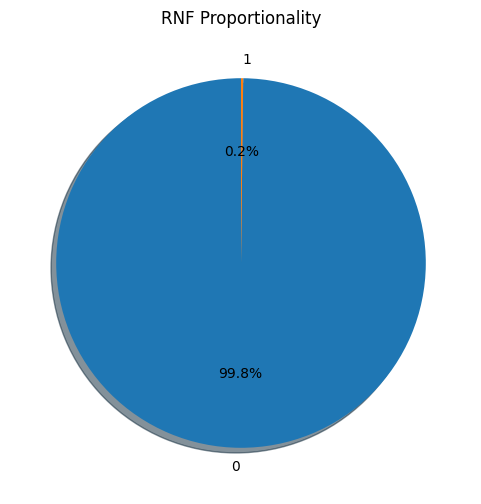

In [30]:
target_col = df.columns[-1]

plt.figure(figsize=(6,6))
grade_counts = df[target_col].value_counts()
plt.pie(
    grade_counts,
    labels=grade_counts.index,
    autopct='%.1f%%',
    shadow=True,
    startangle=90
)
plt.title(f'{target_col} Proportionality')
plt.show()
